# Characteristics of Businesses - Group Exercise

In [1]:
import pandas as pd
import requests

tech_variables = 'https://api.census.gov/data/2018/abstcb/variables.html'
owner_variables = 'https://api.census.gov/data/2018/abscbo/variables.html'
characteristics_variables = 'https://api.census.gov/data/2018/abscb/variables.html'
company_summary_variables = 'https://api.census.gov/data/2018/abscs/variables.html'


### Get Tables of Variables

In [2]:
tech_vars = pd.read_html(tech_variables)[0]
owner_vars = pd.read_html(owner_variables)[0]
characteristic_vars = pd.read_html(characteristics_variables)[0]
company_summary_vars = pd.read_html(company_summary_variables)[0]

tech_vars = tech_vars[[_ for _ in tech_vars.columns[:2]]]
owner_vars = owner_vars[[_ for _ in owner_vars.columns[:2]]]
characteristic_vars = characteristic_vars[[_ for _ in characteristic_vars.columns[:2]]]
company_summary_vars = company_summary_vars[[_ for _ in company_summary_vars.columns[:2]]] 

tech_vars.rename(columns = {'Label': 'Tech Labels'}, inplace = True)
owner_vars.rename(columns = {'Label': 'Owner Labels'}, inplace = True)
characteristic_vars.rename(columns = {'Label': 'Characteristic Labels'}, inplace = True)
company_summary_vars.rename(columns = {'Label': 'Company Summary Labels'}, inplace = True)

In [3]:
grouped_tables = pd.merge(tech_vars, owner_vars, left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables = pd.merge(grouped_tables, characteristic_vars, left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables = pd.merge(grouped_tables, company_summary_vars , left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables.fillna("-", inplace = True)
grouped_tables = grouped_tables[(~grouped_tables['Tech Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Owner Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Characteristic Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Company Summary Labels'].str.contains('Standard error|standard error'))]

grouped_tables.reset_index(drop = True, inplace = True)
grouped_tables = grouped_tables[:-2]

In [4]:
# grouped_tables.sort_values(by = 'Name', ascending = False)
vars_of_interest = [
    'NAICS2017',
    'YIBSZFI',
    'SEX',
    'QDESC',
    'NSFSZFI',
    'GEO_ID',
    'RACE_GROUP',
    'BUSCHAR',
    'OWNER_RACE',
    'OWNER_SEX']
target_subset = grouped_tables[(grouped_tables['Name'].isin(vars_of_interest))]
target_subset = target_subset[['Name','Company Summary Labels','Characteristic Labels','Owner Labels','Tech Labels']]

### Build variable strings to pass to api call


In [5]:
variable_dict = {}
for i,label in enumerate(target_subset.columns[1:]):
    variable_list = []
    for item in target_subset[(target_subset[label] != "-")].Name.tolist():
        variable_list.append(item)
        variable_list.append(f'{item}_LABEL')
    variable_list = [_ for _ in variable_list if _ not in ['GEO_ID_LABEL']]#, 'QDESC_LABEL']]
    in_table = "NAME," + ",".join(variable_list)
    variable_dict[i] = in_table
variable_dict


{0: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL',
 1: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YIBSZFI,YIBSZFI_LABEL',
 2: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL',
 3: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL'}

In [6]:
# Might be able to pass in the same vars for every call, and if it exists it will be returned. Not sure if this will work.
# otherwise, store the variables in a dictionary where the key is 0-3 and the values are a string of the variables

industry_code = '61'
qdesc1 = 'B27'
# links = [
#     f'https://api.census.gov/data/2018/abscs?get={variable_dict[0]}&for=state:*&NAICS2017={industry_code}',
#     f'https://api.census.gov/data/2018/abscb?get={variable_dict[1]}&for=state:*&NAICS2017={industry_code}&BUSCHAR&QDESC={qdesc1}',
#     f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]}&for=state:*&OWNCHAR=CG&NAICS2017={industry_code}&QDESC={qdesc1}',
#     f'https://api.census.gov/data/2018/abstcb?get={variable_dict[3]}&for=state:*&NAICS2017={industry_code}'
# ]
# removed from working link: GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL
links = [
    f'https://api.census.gov/data/2018/abscs?get={variable_dict[0]}&for=state:*',
    f'https://api.census.gov/data/2018/abscb?get={variable_dict[1]}&for=state:*',
    #f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]}&for=state:*',
    #f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]}&for=state:*&OWNCHAR=*&NAICS2017=*&QDESC=*',
    f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]},OWNCHAR,OWNCHAR_LABEL&for=us:*&for=QDESC_LABEL=YRACQBUS',
    f'https://api.census.gov/data/2018/abstcb?get={variable_dict[3]},TECHUSE&for=state:*',
]

def get_data_frame(url):
    return pd.read_csv(url)
    
for link in links:
    print(link)
    print("")

https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL&for=state:*

https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YIBSZFI,YIBSZFI_LABEL&for=state:*

https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL&for=us:*&for=QDESC_LABEL=YRACQBUS

https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,TECHUSE&for=state:*



### The cell below is where the dataframes are first stored.

In [7]:
comp_sum_df = get_data_frame(links[0]) # Company Summary
bus_char_df = business_char_df = get_data_frame(links[1]) # Business Characteristics
bus_own_df = business_own_df = get_data_frame(links[2]) # Business Owners
bus_tech_df = get_data_frame(links[3]) # Business Tech   

In [8]:
df_collection = [comp_sum_df, bus_char_df, bus_own_df, bus_tech_df]    
df_names = ['comp_sum_df', 'bus_char_df', 'bus_own_df', 'bus_tech_df']   

### Clean DataFrames

In [9]:
drop_list = ['race_group','sex','yibszfi','qdesc','buschar','owner_race','owner_sex','naics2017','us','ownchar']
for df in df_collection:
    column_names = [_ for _ in df.columns.tolist()]
    new_column_names = [_.replace("[[","").replace('"',"").replace("]","").lower() for _ in column_names]

    df.columns = new_column_names
    df.drop(columns = [_ for _ in new_column_names if ('unnamed' in _ or _ in drop_list)],inplace = True)
    df['name'] = df['name'].apply(lambda x: x.replace("[","").replace('"',""))

### Display some info about dataframes.

In [10]:
for i,df in enumerate(df_collection):
    print('\n############# NEW DATAFRAME ################')
    print('Displaying column value counts where there are fewer than 10 unique values in the column.')
    print(df_names[i],"\n***************************")
    for column in df:
        if len(df[column].unique().tolist()) < 10:
            print(df[column].value_counts())
            print("")
    print('############# END OF DATAFRAME INFO ################\n')


############# NEW DATAFRAME ################
Displaying column value counts where there are fewer than 10 unique values in the column.
comp_sum_df 
***************************
Total                                         27311
White                                         11327
Nonminority                                   11320
Minority                                       9285
Asian                                          7748
Black or African American                      6433
Equally minority/nonminority                   6133
American Indian and Alaska Native              4509
Native Hawaiian and Other Pacific Islander     2126
Name: race_group_label, dtype: int64

Total                  44001
Male                   15588
Female                 13737
Equally male/female    12866
Name: sex_label, dtype: int64

All firms                                   27090
Firms with less than 2 years in business    10764
Firms with 16 or more years in business     10629
Firms with 6 to 10 y

# Visuals

In [11]:
grouped_tables.head()

,Name,Tech Labels,Owner Labels,Characteristic Labels,Company Summary Labels
0,EMP,Number of employees,-,Number of employees,Number of employees
1,EMP_PCT,Percent of employees (%),-,Percent of employees (%),-
2,ETH_GROUP,Ethnicity code,-,Ethnicity code,Ethnicity code
3,FACTORS_P,Factors adversely affecting technology product...,-,-,-
4,FACTORS_U,Factors adversely affecting technology use code,-,-,-


In [13]:
df_collection[0]

,name,geo_id,naics2017_label,race_group_label,sex_label,yibszfi_label,state
0,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28]
1,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with 2 to 3 years in business,28]
2,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Male,All firms,28]
3,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Equally minority/nonminority,Total,All firms,28]
4,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Equally minority/nonminority,Total,Firms with 4 to 5 years in business,28]
...,...,...,...,...,...,...,...
86187,Michigan,0400000US26,Total for all sectors,Nonminority,Equally male/female,Firms with 16 or more years in business,26]
86188,Michigan,0400000US26,"Agriculture, forestry, fishing and hunting",Total,Equally male/female,Firms with 4 to 5 years in business,26]
86189,Michigan,0400000US26,"Agriculture, forestry, fishing and hunting",Total,Equally male/female,Firms with 16 or more years in business,26]
86190,Michigan,0400000US26,"Agriculture, forestry, fishing and hunting",White,Total,All firms,26]


In [14]:
df_collection[1]

,name,geo_id,naics2017_label,race_group_label,sex_label,qdesc_label,buschar_label,yibszfi_label,state
0,Mississippi,0400000US28,Total for all sectors,Total,Total,OWNRNUM,All firms,All firms,28]
1,Mississippi,0400000US28,Total for all sectors,Total,Total,OWNRNUM,1 person,All firms,28]
2,Mississippi,0400000US28,Total for all sectors,Total,Total,OWNRNUM,2 to 4 people,All firms,28]
3,Mississippi,0400000US28,Total for all sectors,Total,Total,OWNRNUM,5 to 10 people,All firms,28]
4,Mississippi,0400000US28,Total for all sectors,Total,Total,OWNRNUM,11 or more people,All firms,28]
...,...,...,...,...,...,...,...,...,...
2290,Minnesota,0400000US27,Total for all sectors,Total,Total,CEASEOPS,All firms,All firms,27]
2291,Minnesota,0400000US27,Total for all sectors,Total,Total,CEASEOPS,Business is currently operating,All firms,27]
2292,Minnesota,0400000US27,Total for all sectors,Total,Total,CEASEOPS,Business operations have ceased,All firms,27]
2293,Minnesota,0400000US27,Total for all sectors,Total,Total,CEASEOPS,Total reporting,All firms,27]


In [15]:
df_collection[2]

,name,geo_id,naics2017_label,owner_race_label,owner_sex_label,qdesc_label,ownchar_label
0,United States,0100000US,Total for all sectors,Black or African American,All owners of respondent firms,YRACQBUS,2013 to 2017
1,United States,0100000US,Total for all sectors,Black or African American,All owners of respondent firms,YRACQBUS,2018
2,United States,0100000US,Total for all sectors,Black or African American,All owners of respondent firms,YRACQBUS,Don't know
3,United States,0100000US,Total for all sectors,Black or African American,All owners of respondent firms,YRACQBUS,Total reporting
4,United States,0100000US,Total for all sectors,Black or African American,All owners of respondent firms,YRACQBUS,Item not reported
...,...,...,...,...,...,...,...
46093,United States,0100000US,Industries not classified,All owners of respondent firms,Male,PRIORBUSTAT,Business was purchased by another company
46094,United States,0100000US,Industries not classified,All owners of respondent firms,Male,PRIORBUSTAT,Business was purchased by another individual
46095,United States,0100000US,Industries not classified,All owners of respondent firms,Male,PRIORBUSTAT,Other
46096,United States,0100000US,Industries not classified,All owners of respondent firms,Male,PRIORBUSTAT,Total reporting


In [16]:
df_collection[3]

,name,geo_id,naics2017_label,nsfszfi,nsfszfi_label,race_group_label,sex_label,techuse,state
0,Alabama,0400000US01,Total for all sectors,1,All firms,Total,Total,T2E03B99,01]
1,Alabama,0400000US01,Total for all sectors,1,All firms,Total,Total,T2E03BA9,01]
2,Alabama,0400000US01,Total for all sectors,1,All firms,Total,Total,T3E03B01,01]
3,Alabama,0400000US01,Total for all sectors,1,All firms,Total,Total,T3E03B02,01]
4,Alabama,0400000US01,Total for all sectors,1,All firms,Total,Total,T3E03B03,01]
...,...,...,...,...,...,...,...,...,...
42835,Wyoming,0400000US56,Other services (except public administration),1,All firms,Total,Total,T5E03B04,56]
42836,Wyoming,0400000US56,Other services (except public administration),1,All firms,Total,Total,T5E03B05,56]
42837,Wyoming,0400000US56,Other services (except public administration),1,All firms,Total,Total,T5E03B06,56]
42838,Wyoming,0400000US56,Other services (except public administration),1,All firms,Total,Total,T5E03B99,56]


In [37]:
x.shape

(3878640, 15)

In [48]:
x = pd.merge(df_collection[0],df_collection[1],on='geo_id')[:50000]
# x = pd.merge(x,df_collection[2],on='geo_id')
df_all = pd.merge(x,df_collection[3][:50000],on='geo_id')

In [50]:
df_all.head()

,name_x,geo_id,naics2017_label_x,race_group_label_x,sex_label_x,yibszfi_label_x,state_x,name_y,naics2017_label_y,race_group_label_y,...,yibszfi_label_y,state_y,name,naics2017_label,nsfszfi,nsfszfi_label,race_group_label,sex_label,techuse,state
0,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B05,28]
1,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B06,28]
2,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B99,28]
3,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03BA9,28]
4,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T3E03B01,28]


In [51]:
df_all.head()

,name_x,geo_id,naics2017_label_x,race_group_label_x,sex_label_x,yibszfi_label_x,state_x,name_y,naics2017_label_y,race_group_label_y,...,yibszfi_label_y,state_y,name,naics2017_label,nsfszfi,nsfszfi_label,race_group_label,sex_label,techuse,state
0,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B05,28]
1,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B06,28]
2,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B99,28]
3,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03BA9,28]
4,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T3E03B01,28]


In [52]:
df_all.head(2).T

,0,1
name_x,Mississippi,Mississippi
geo_id,0400000US28,0400000US28
naics2017_label_x,"Mining, quarrying, and oil and gas extraction","Mining, quarrying, and oil and gas extraction"
race_group_label_x,Minority,Minority
sex_label_x,Total,Total
yibszfi_label_x,Firms with less than 2 years in business,Firms with less than 2 years in business
state_x,28],28]
name_y,Mississippi,Mississippi
naics2017_label_y,Total for all sectors,Total for all sectors
race_group_label_y,Total,Total


In [54]:
df_all.head()

,name_x,geo_id,naics2017_label_x,race_group_label_x,sex_label_x,yibszfi_label_x,state_x,name_y,naics2017_label_y,race_group_label_y,...,yibszfi_label_y,state_y,name,naics2017_label,nsfszfi,nsfszfi_label,race_group_label,sex_label,techuse,state
0,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B05,28]
1,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B06,28]
2,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B99,28]
3,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03BA9,28]
4,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T3E03B01,28]


In [56]:
df_all['race_group_label_x'].unique()

array(['Minority', 'Equally minority/nonminority', 'Nonminority',
       'Black or African American', 'American Indian and Alaska Native',
       'Total', 'Asian', 'White',
       'Native Hawaiian and Other Pacific Islander'], dtype=object)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Marjea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Minority'),
  Text(1, 0, 'Equally minority/nonminority'),
  Text(2, 0, 'Nonminority'),
  Text(3, 0, 'Black or African American'),
  Text(4, 0, 'American Indian and Alaska Native'),
  Text(5, 0, 'Total'),
  Text(6, 0, 'Asian'),
  Text(7, 0, 'White'),
  Text(8, 0, 'Native Hawaiian and Other Pacific Islander')])

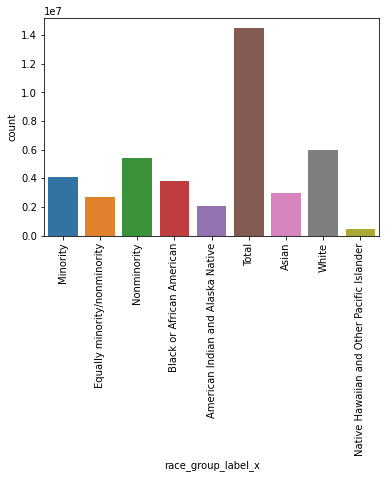

In [60]:
sns.countplot(df_all['race_group_label_x'])
plt.xticks(rotation=90)

In [61]:
df_all.head(2)

,name_x,geo_id,naics2017_label_x,race_group_label_x,sex_label_x,yibszfi_label_x,state_x,name_y,naics2017_label_y,race_group_label_y,...,yibszfi_label_y,state_y,name,naics2017_label,nsfszfi,nsfszfi_label,race_group_label,sex_label,techuse,state
0,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B05,28]
1,Mississippi,0400000US28,"Mining, quarrying, and oil and gas extraction",Minority,Total,Firms with less than 2 years in business,28],Mississippi,Total for all sectors,Total,...,All firms,28],Mississippi,"Agriculture, forestry, fishing and hunting",1,All firms,Total,Total,T2E03B06,28]


In [62]:
list(df_all)

['name_x',
 'geo_id',
 'naics2017_label_x',
 'race_group_label_x',
 'sex_label_x',
 'yibszfi_label_x',
 'state_x',
 'name_y',
 'naics2017_label_y',
 'race_group_label_y',
 'sex_label_y',
 'qdesc_label',
 'buschar_label',
 'yibszfi_label_y',
 'state_y',
 'name',
 'naics2017_label',
 'nsfszfi',
 'nsfszfi_label',
 'race_group_label',
 'sex_label',
 'techuse',
 'state']

In [ ]:
sex_label_x naics2017_label_x

C:\Users\Marjea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Total'),
  Text(1, 0, 'Male'),
  Text(2, 0, 'Female'),
  Text(3, 0, 'Equally male/female')])

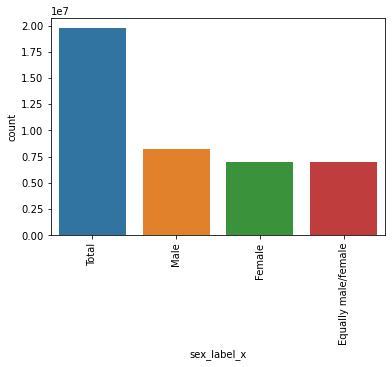

In [63]:
sns.countplot(df_all['sex_label_x'])
plt.xticks(rotation=90)

C:\Users\Marjea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Mining, quarrying, and oil and gas extraction'),
  Text(1, 0, 'Construction'),
  Text(2, 0, 'Manufacturing'),
  Text(3, 0, 'Transportation and warehousing'),
  Text(4, 0, 'Total for all sectors'),
  Text(5, 0, 'Retail trade'),
  Text(6, 0, 'Agriculture, forestry, fishing and hunting'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Wholesale trade'),
  Text(9, 0, 'Information'),
  Text(10, 0, 'Professional, scientific, and technical services'),
  Text(11, 0, 'Administrative and support and waste management and remediation services'),
  Text(12, 0, 'Health care and social assistance'),
  Text(13, 0, 'Arts, entertainment, and recreation'),
  Text(14, 0, 'Accommodation and food services'),
  Text(15, 0, 'Management of companies and enterprises'),
  Text(16, 0, 'Real estate and rental and leasing'),
  Text(17, 0, 'Industries not classified'),
  Text(18, 0, 'Other services (except public ad

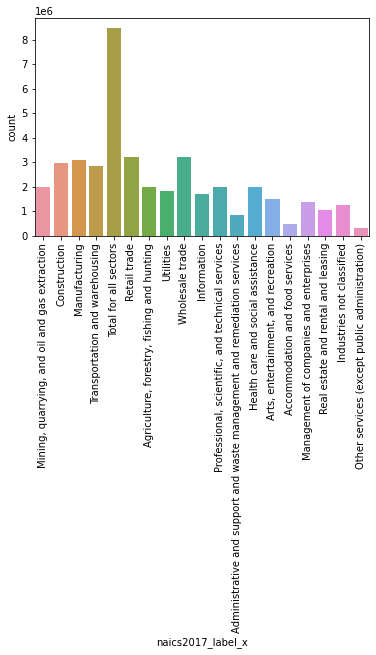

In [64]:
sns.countplot(df_all['naics2017_label_x'])
plt.xticks(rotation=90)

In [65]:
df_all.dtypes

name_x                object
geo_id                object
naics2017_label_x     object
race_group_label_x    object
sex_label_x           object
yibszfi_label_x       object
state_x               object
name_y                object
naics2017_label_y     object
race_group_label_y    object
sex_label_y           object
qdesc_label           object
buschar_label         object
yibszfi_label_y       object
state_y               object
name                  object
naics2017_label       object
nsfszfi                int64
nsfszfi_label         object
race_group_label      object
sex_label             object
techuse               object
state                 object
dtype: object

In [81]:
y = df_all['yibszfi_label_x'].value_counts()

In [82]:
y

All firms                                   12705000
Firms with 16 or more years in business      5443200
Firms with less than 2 years in business     5254200
Firms with 6 to 10 years in business         5140800
Firms with 2 to 3 years in business          4687200
Firms with 11 to 15 years in business        4422600
Firms with 4 to 5 years in business          4347000
Name: yibszfi_label_x, dtype: int64

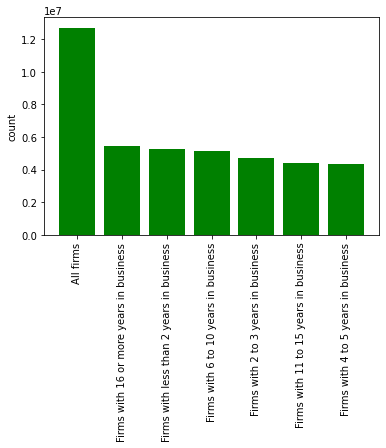

In [85]:
plt.bar(y.index,y,color='g')
_ = plt.xticks(rotation=90)
plt.ylabel('count')
# plt.xlabel('x label')
# plt.title('title')
plt.show()